In [ ]:
import pandas as pd

file_path = 'D:\StudyTrack_AI_StudentRecommender\MILESTONE 1\data\Online Retail.xlsx'  

df = pd.read_excel(file_path)

df.head()


<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
C:\Users\tarun\AppData\Local\Temp\ipykernel_18888\1231912885.py:3: SyntaxWarning: invalid escape sequence '\S'
  file_path = 'D:\StudyTrack_AI_StudentRecommender\MILESTONE 1\Online Retail.xlsx'


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Take unique customer records
customers = df[['CustomerID', 'Country']].drop_duplicates()
customers = customers.dropna(subset=['CustomerID'])   # remove rows without ID

# Save to CSV
customers.to_csv('customers.csv', index=False)


In [4]:
# Remove rows without CustomerID (to clean nulls)
transactions = df.dropna(subset=['CustomerID'])

# Save to CSV
transactions.to_csv('transactions.csv', index=False)


In [5]:
# Read both tables again
customers = pd.read_csv('customers.csv')
transactions = pd.read_csv('transactions.csv')

# Merge using CustomerID
merged_df = pd.merge(transactions, customers, on='CustomerID', how='inner')

merged_df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country_x,Country_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,United Kingdom


In [6]:
# Remove duplicates
merged_df.drop_duplicates(inplace=True)

# Convert date column
merged_df['InvoiceDate'] = pd.to_datetime(merged_df['InvoiceDate'])

# Check missing values
merged_df.isnull().sum()

# Summary
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 402528 entries, 0 to 407754
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    402528 non-null  object        
 1   StockCode    402528 non-null  object        
 2   Description  402528 non-null  object        
 3   Quantity     402528 non-null  int64         
 4   InvoiceDate  402528 non-null  datetime64[ns]
 5   UnitPrice    402528 non-null  float64       
 6   CustomerID   402528 non-null  float64       
 7   Country_x    402528 non-null  object        
 8   Country_y    402528 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.7+ MB


In [7]:
print(merged_df.describe())

# Correlation between numerical columns
print(merged_df[['Quantity','UnitPrice']].corr())


            Quantity                    InvoiceDate      UnitPrice  \
count  402528.000000                         402528  402528.000000   
mean       12.185811  2011-07-10 09:23:11.700303872       3.475136   
min    -80995.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-06 14:23:00       1.250000   
50%         5.000000            2011-07-29 13:37:00       1.950000   
75%        12.000000            2011-10-20 11:30:00       3.750000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       249.999201                            NaN      69.684305   

          CustomerID  
count  402528.000000  
mean    15274.592175  
min     12346.000000  
25%     13911.000000  
50%     15134.000000  
75%     16780.000000  
max     18287.000000  
std      1717.506369  
           Quantity  UnitPrice
Quantity   1.000000  -0.001247
UnitPrice -0.001247   1.000000


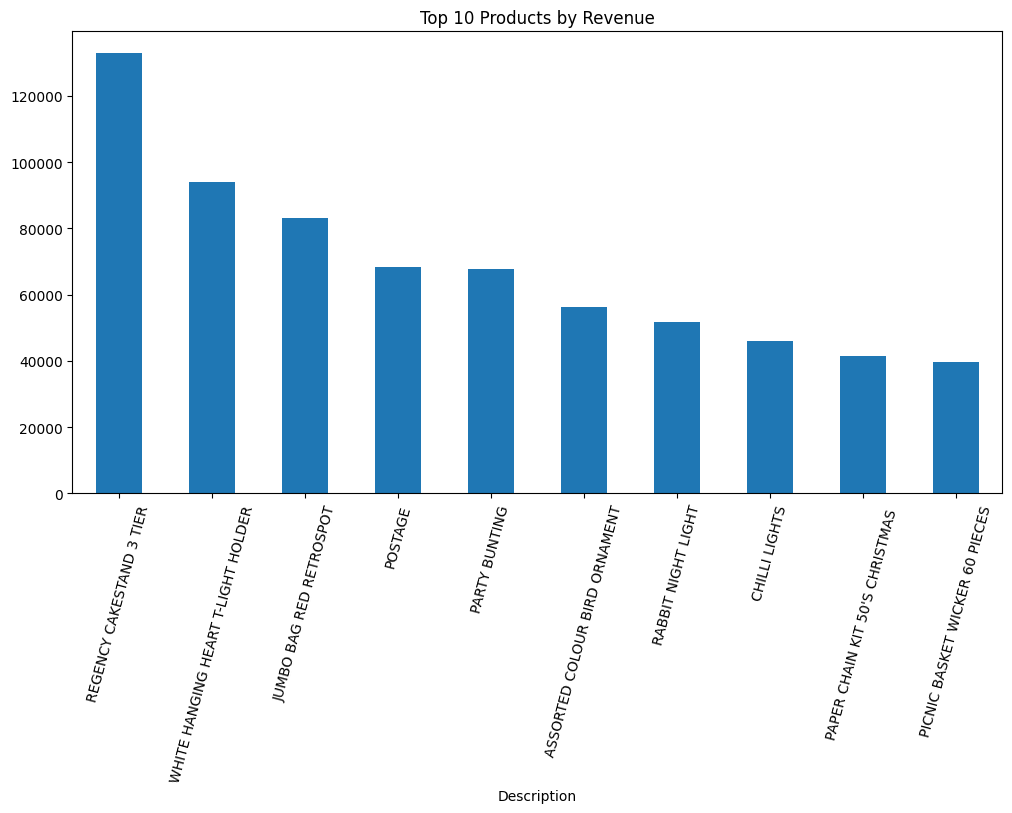

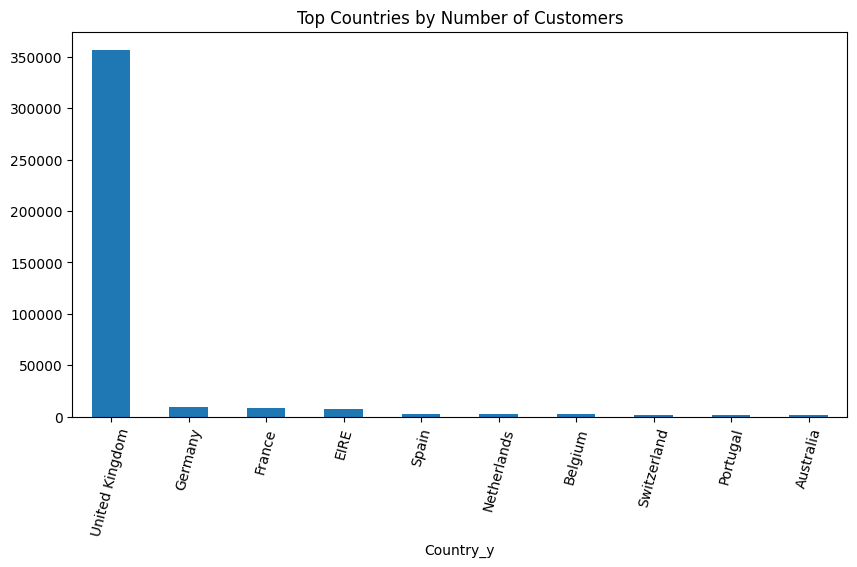

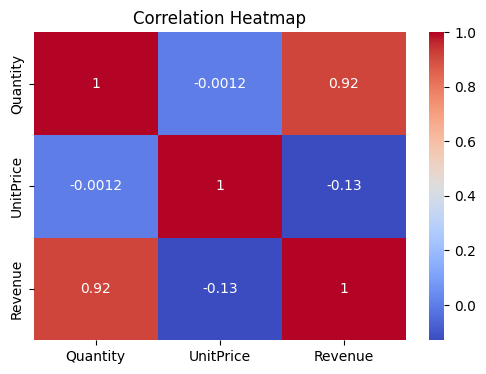

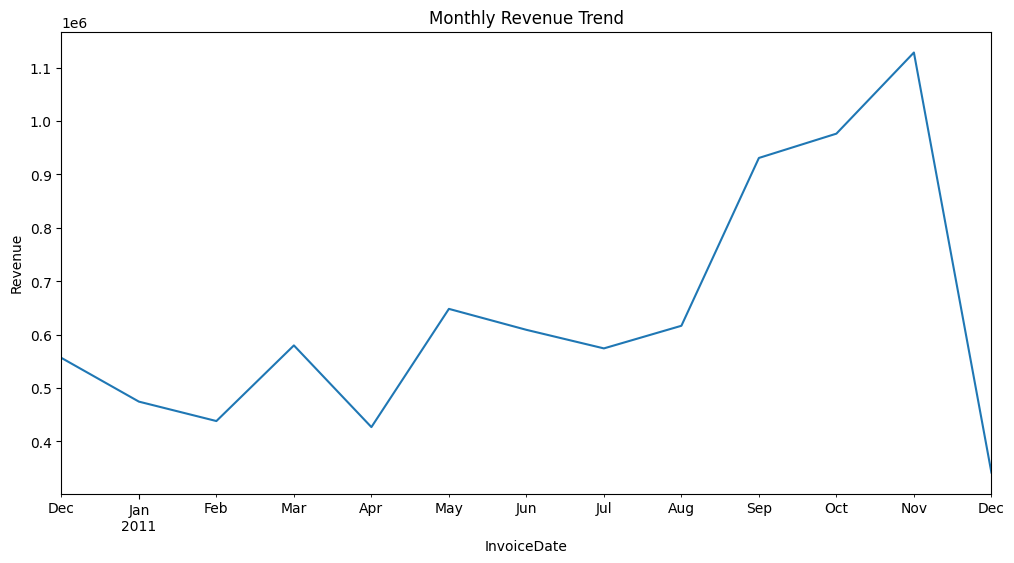

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Revenue column
merged_df['Revenue'] = merged_df['Quantity'] * merged_df['UnitPrice']

# 1️⃣ Top 10 products by revenue
top_products = merged_df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(12,6))
plt.title('Top 10 Products by Revenue')
plt.xticks(rotation=75)
plt.show()

# 2️⃣ Customers by country
# select existing country column to avoid KeyError after merge (Country, Country_y, Country_x)
country_col = next((c for c in ['Country', 'Country_y', 'Country_x'] if c in merged_df.columns), None)
if country_col is not None:
	merged_df[country_col].value_counts().head(10).plot(kind='bar', figsize=(10,5))
	plt.title('Top Countries by Number of Customers')
	plt.xticks(rotation=75)
	plt.show()
else:
	print("No country column found in merged_df. Available columns:", merged_df.columns.tolist())

# 3️⃣ Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(merged_df[['Quantity','UnitPrice','Revenue']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 4️⃣ Sales over time
merged_df.groupby(merged_df['InvoiceDate'].dt.to_period('M'))['Revenue'].sum().plot(figsize=(12,6))
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.show()
